## Gradio Pets

Set up exporting.

In [ ]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *

def is_cat(x): return x[0].isupper()

In [12]:
#|export
import gradio as gr

In [3]:

path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

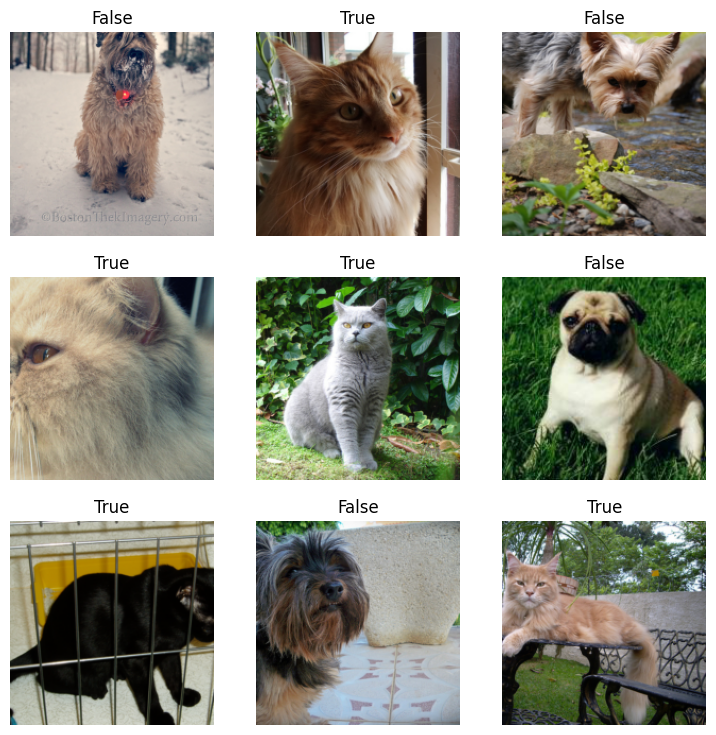

In [4]:
dls.show_batch()

In [5]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 73.2MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.210263,0.032663,0.013532,01:17


epoch,train_loss,valid_loss,error_rate,time
0,0.074095,0.030312,0.009472,01:11


epoch,train_loss,valid_loss,error_rate,time
0,0.074095,0.030312,0.009472,01:11
1,0.041950,0.028780,0.012179,00:59
2,0.020822,0.010446,0.006089,00:57


In [6]:
learn.export('model.pkl')

In [34]:
#|export
learn = load_learner('model.pkl')

Create function to classify images.

In [8]:
#|export
categories = ('Dog','Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return(dict(zip(categories,map(float,probs))))

Set up Gradio interface.

In [14]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()

intf = gr.Interface(fn = classify_image, inputs = image, outputs = label)
intf.launch(inline=False, share=True)

<ipython-input-14-7045eaad4e5c>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(192,192))
<ipython-input-14-7045eaad4e5c>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(192,192))
<ipython-input-14-7045eaad4e5c>:2: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label()
<ipython-input-14-7045eaad4e5c>:2: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3178ba4feaf5a3457a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Export script.

In [13]:
from nbdev.export import notebook2script
notebook2script()

ImportError: cannot import name 'notebook2script' from 'nbdev.export' (/Users/frankiebrockman/mambaforge/lib/python3.10/site-packages/nbdev/export.py)

In [11]:
nbdev_export

NameError: name 'nbdev_export' is not defined